# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [5]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [6]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Tue May  3 18:33:42 2022


In [7]:
#import os
import re
import glob

from collections import namedtuple

## 1D 

In [8]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.)
df

,dtime,x,y,energy
0,0.638073,0.082060,0.021344,42.004998
1,0.263057,-0.195009,0.048264,38.459584
2,0.956119,-0.100742,-0.093581,36.516667
3,0.964837,0.276786,-0.388739,37.713140
4,0.007424,0.065815,-0.350740,45.485097
...,...,...,...,...
78481,0.306053,0.114328,-0.089717,40.115694
78482,0.113094,0.022967,-0.061377,45.081978
78483,0.421380,0.109109,-0.196660,41.686390
78484,0.286144,-0.294181,0.362800,43.282053


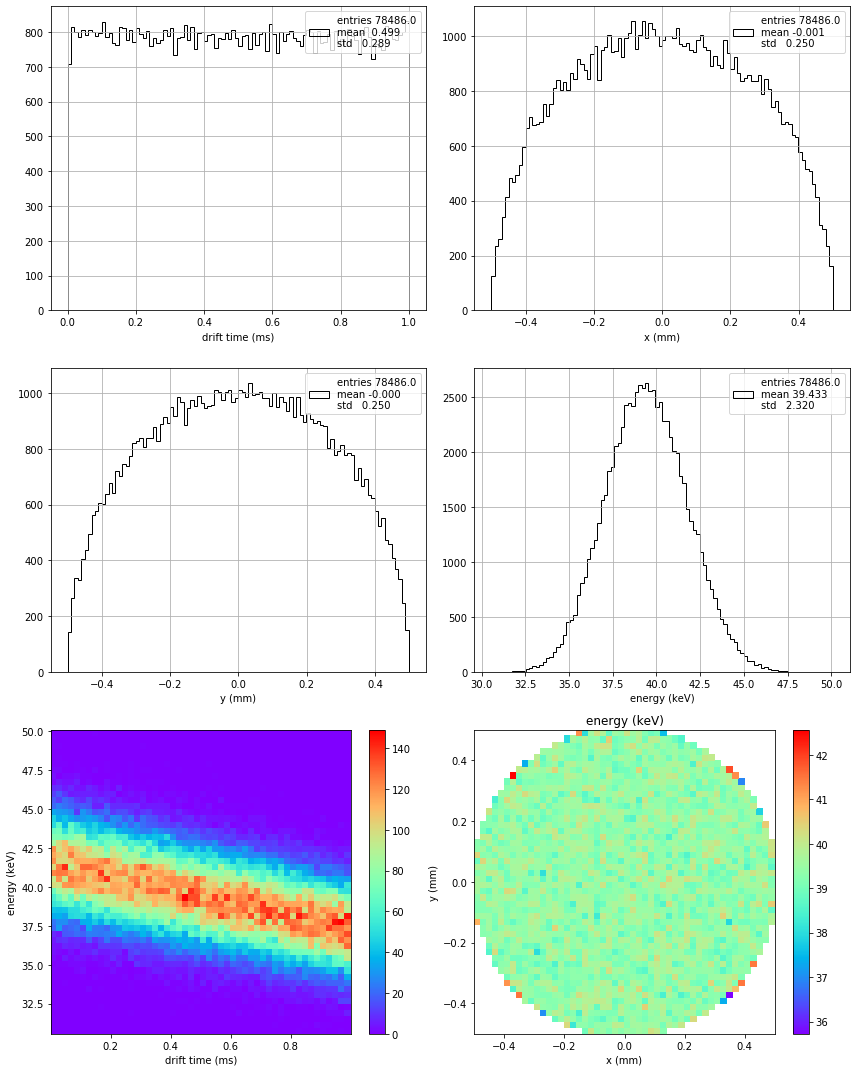

In [9]:
krana.plot_data(df, 50)

In [10]:
coors  = (df.dtime.values,)
energy = df.energy.values
bins   = 100
krmap  = prof.profile(coors, energy, bins)

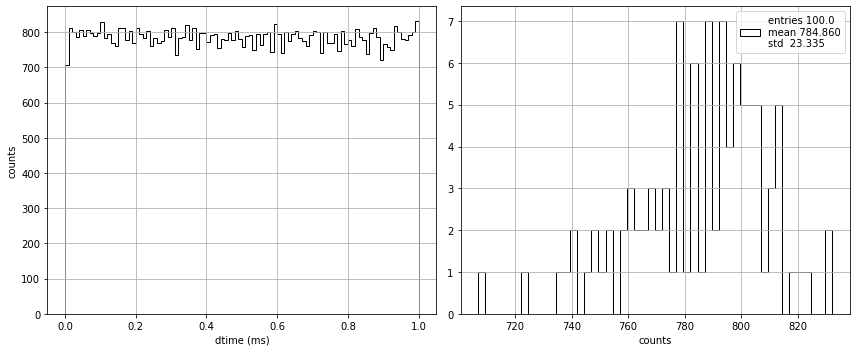

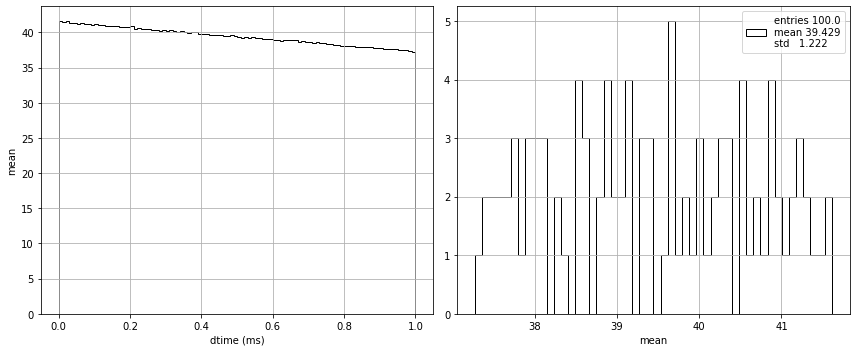

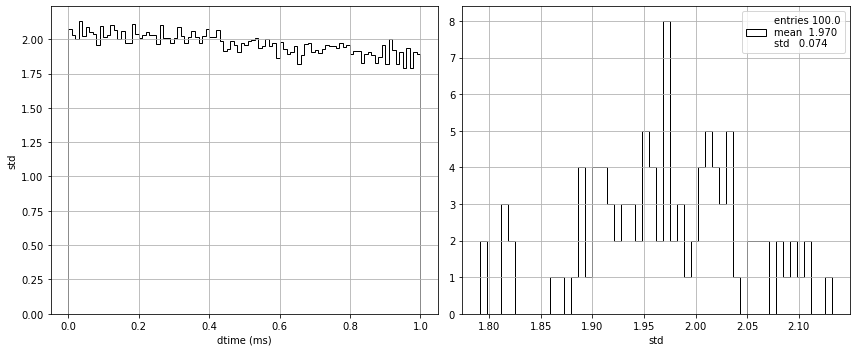

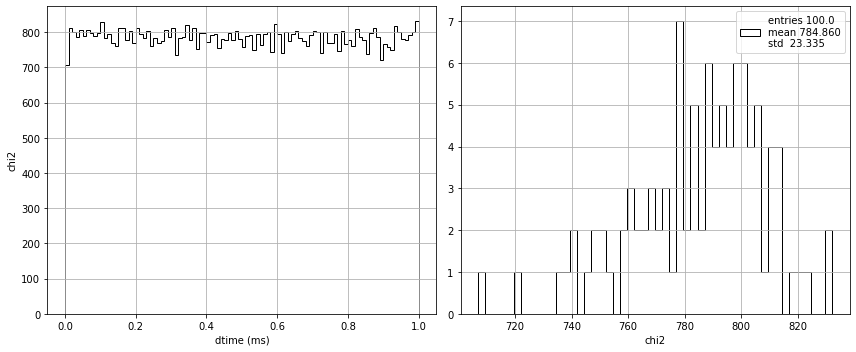

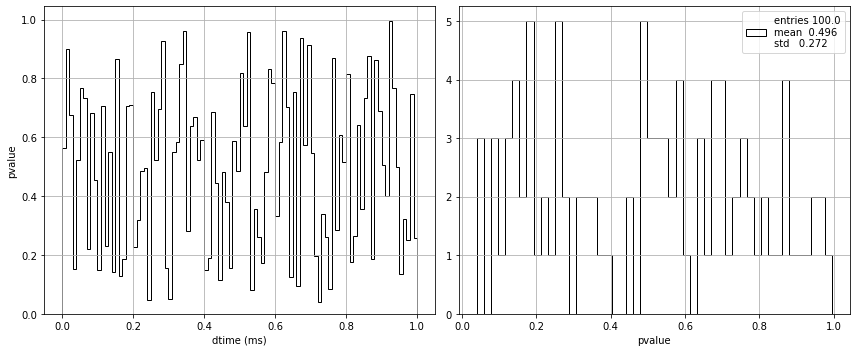

In [11]:
prof.plot_profile(krmap, coornames = ('dtime (ms)',))

### correction

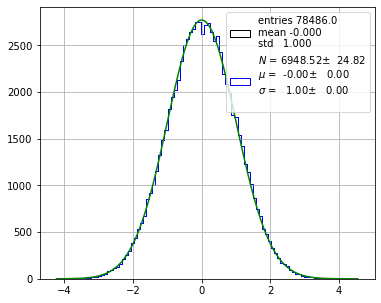

In [12]:
pltext.canvas(1, 1);
pltext.hist(krmap.residuals, 100);
pltext.hfit(krmap.residuals, 100, fun = 'gaus');

In [13]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

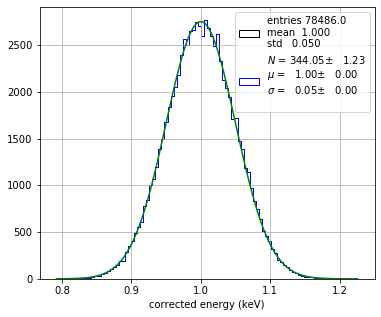

In [15]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)');

### Validate correction

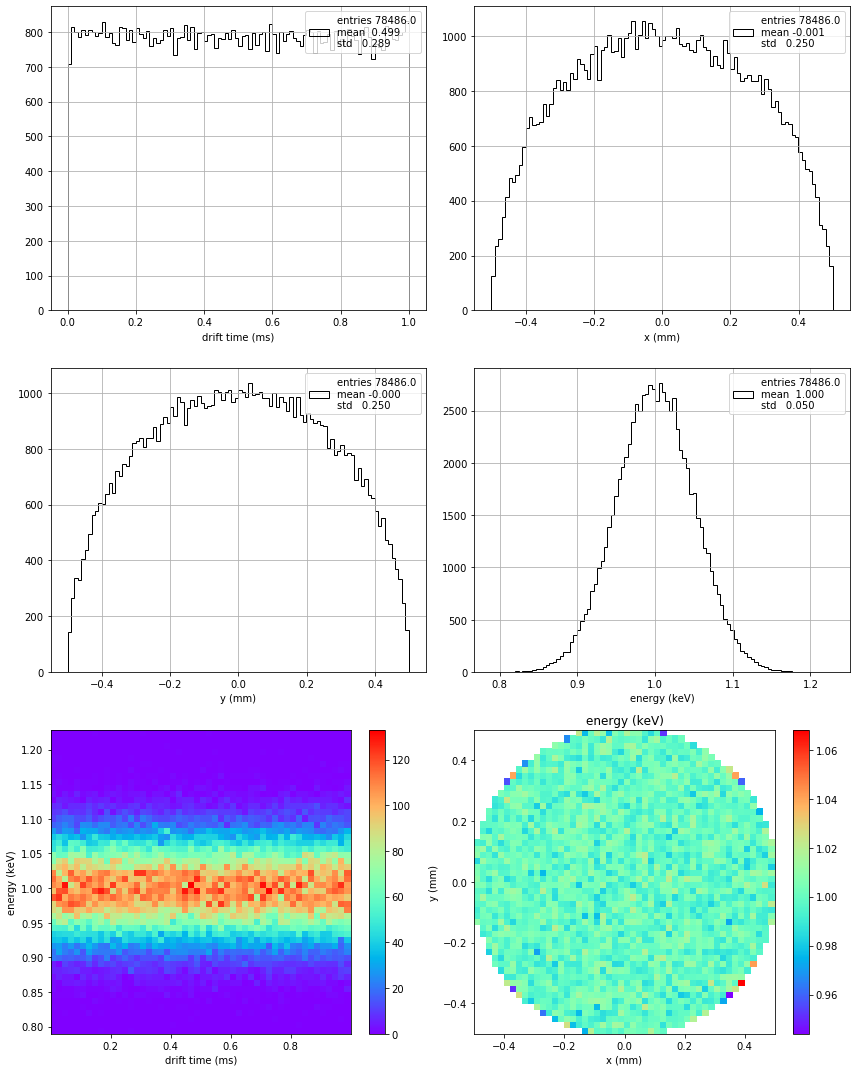

In [17]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

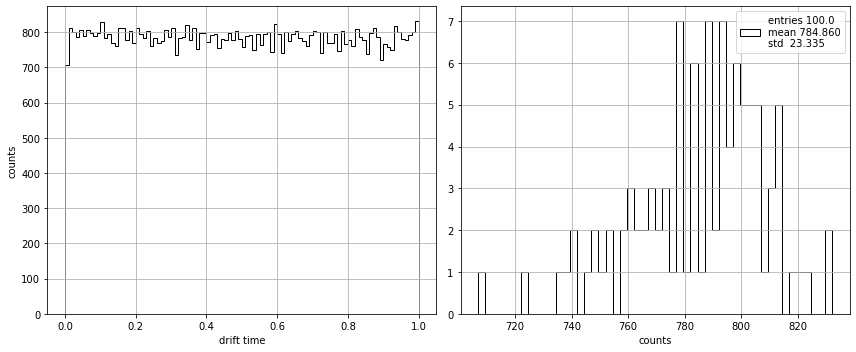

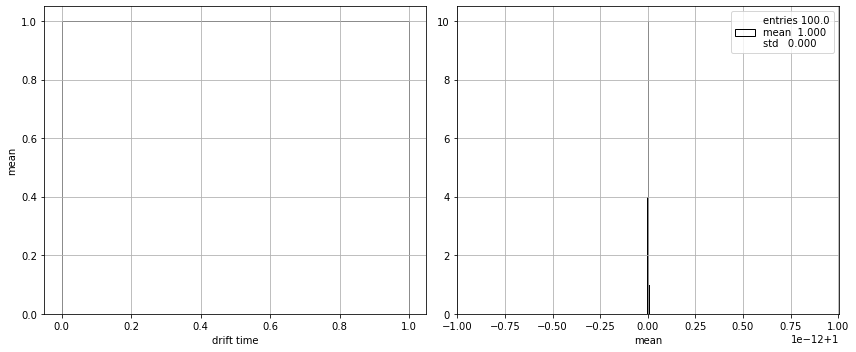

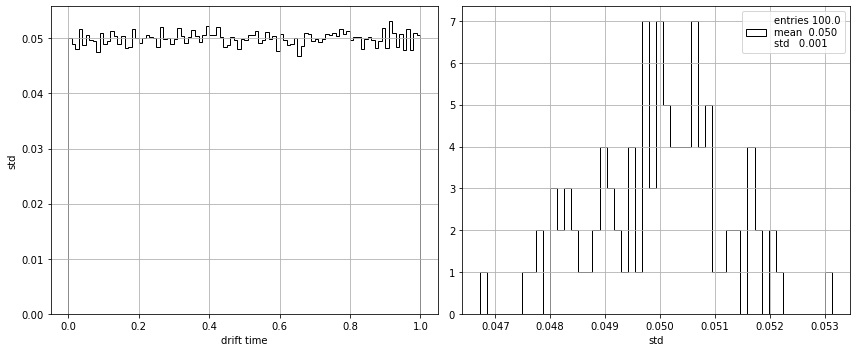

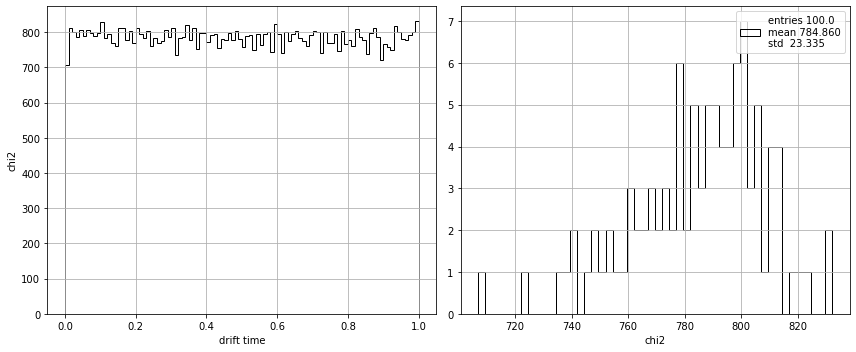

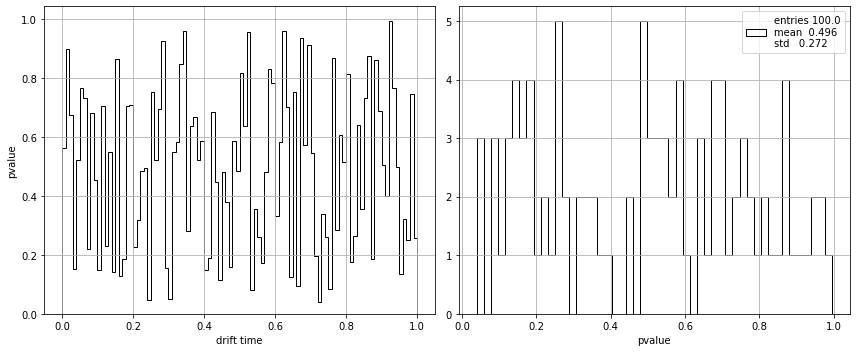

In [19]:
prof.plot_profile(corkrmap, coornames = ('drift time',))

## 2D

In [20]:
df = krana.generate_kr_toy(100000, tau = 0., beta = 0.2)
df

,dtime,x,y,energy
0,0.096840,-0.151476,0.065288,37.818362
1,0.358735,0.312247,-0.324465,33.980088
2,0.432259,-0.250746,0.341149,33.431388
3,0.114873,0.021961,-0.479619,35.254388
4,0.561495,-0.295718,-0.029857,35.666009
...,...,...,...,...
78684,0.748685,-0.121765,-0.280692,38.251568
78685,0.762475,0.259886,0.199383,36.190228
78686,0.196659,0.299136,-0.003175,38.248110
78687,0.249238,-0.009486,-0.314042,39.457266


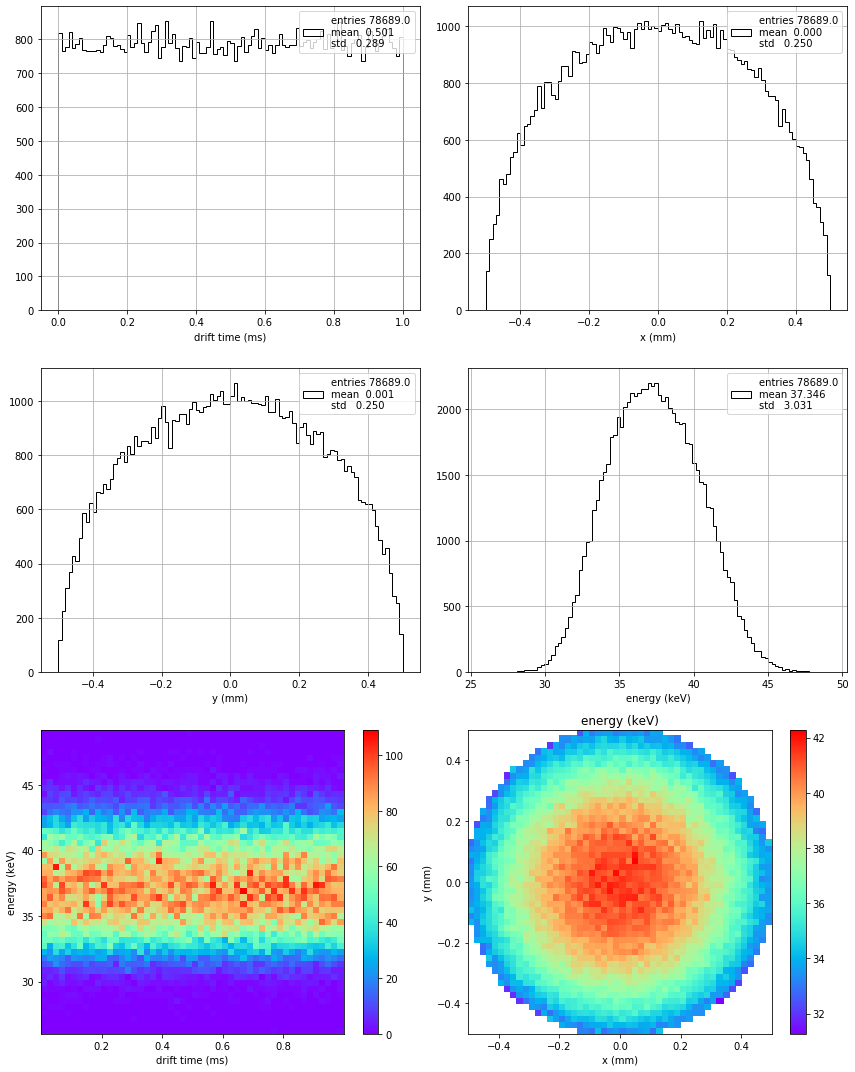

In [21]:
krana.plot_data(df, 50)

### kr  map

In [22]:
coors  = (df.x.values, df.y.values)
energy = df.energy.values
bins   = 40, 40
krmap  = prof.profile(coors, energy, bins)

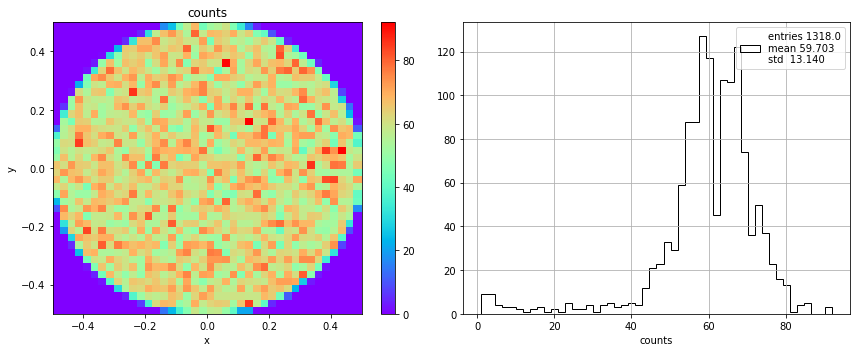

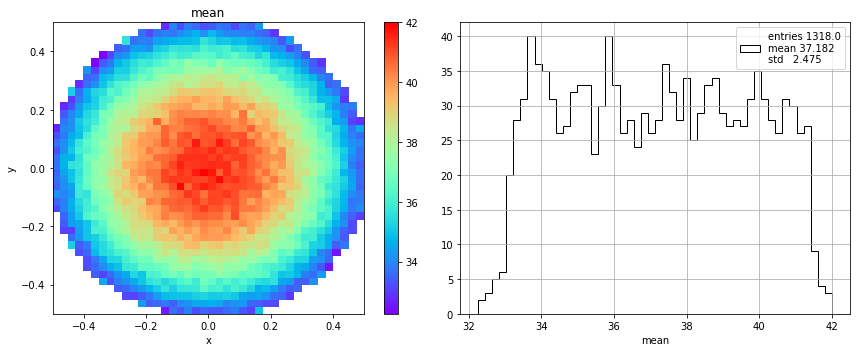

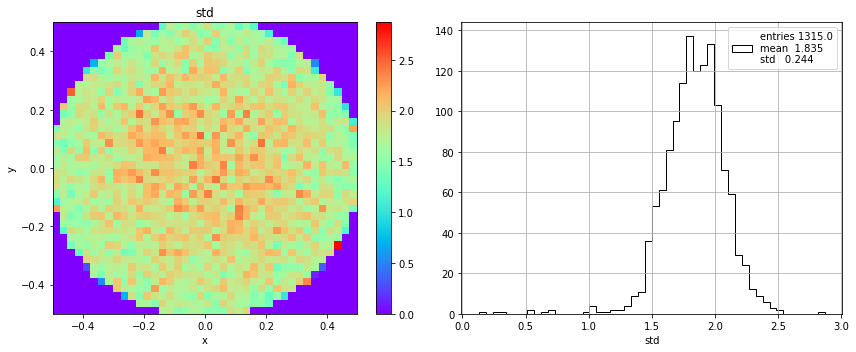

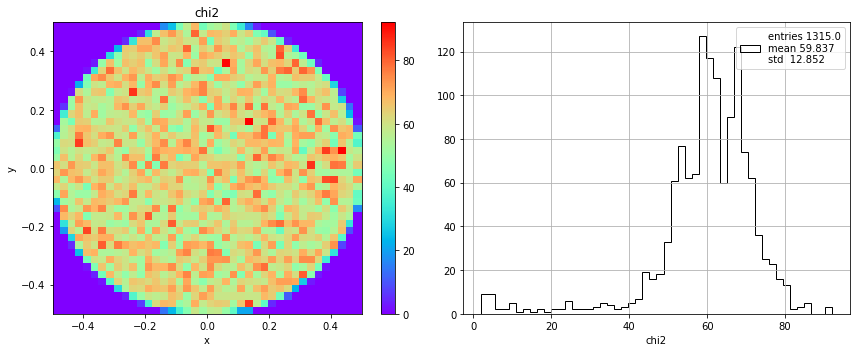

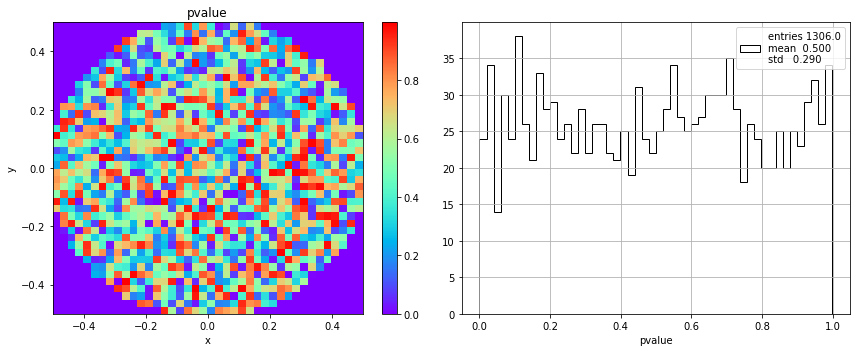

In [23]:
prof.plot_profile(krmap)

### Correction

In [24]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

Text(0.5, 0, 'corrected energy (keV)')

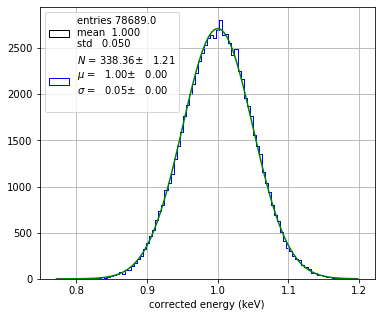

In [26]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)')

### Validate correction

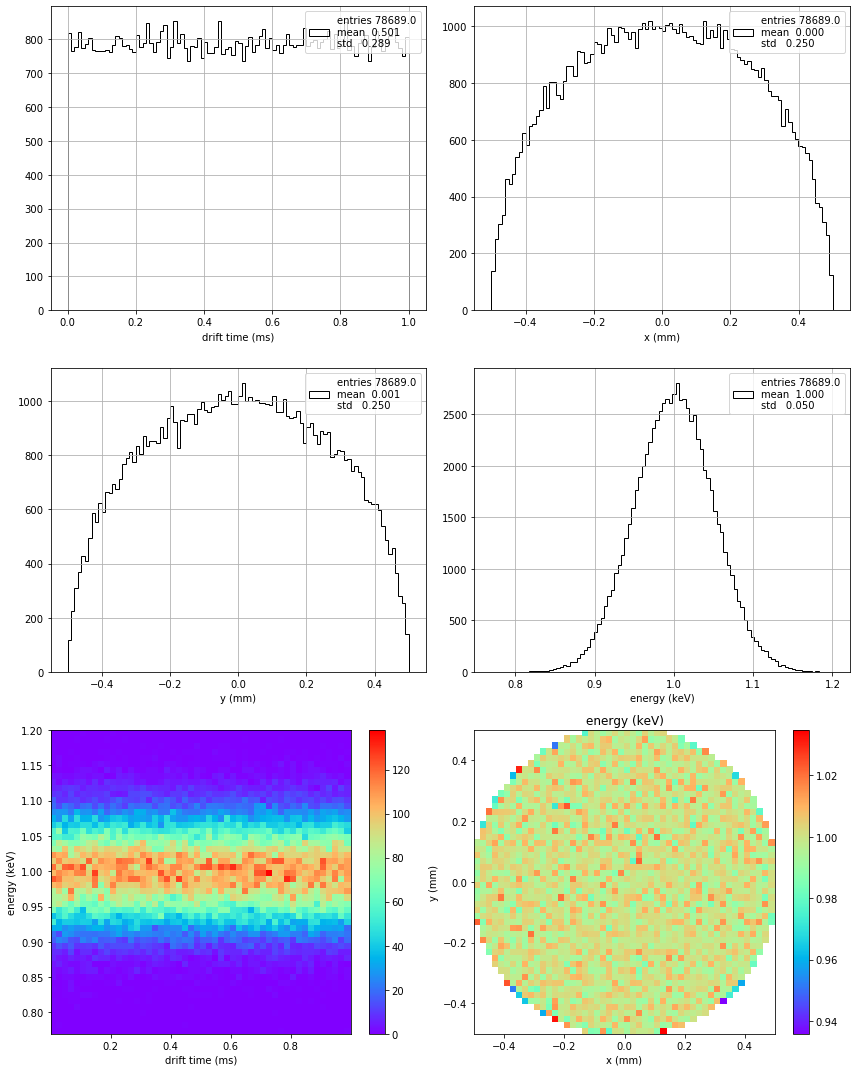

In [30]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50)

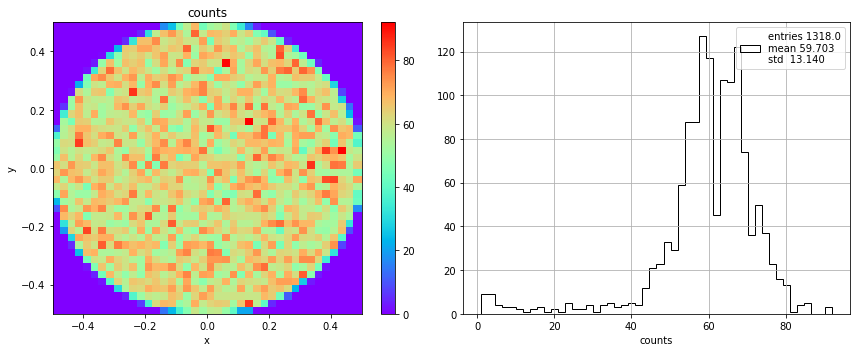

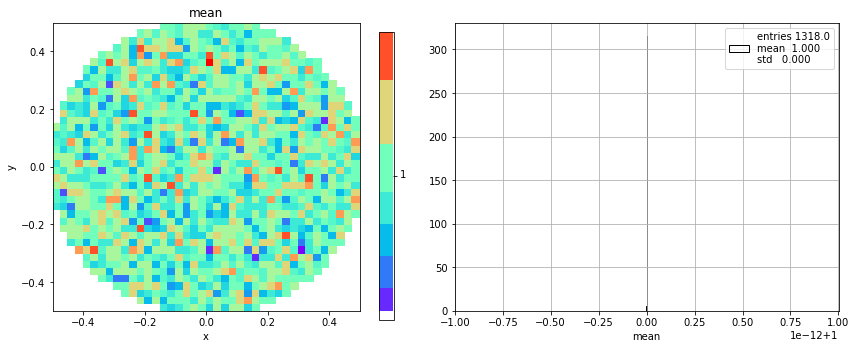

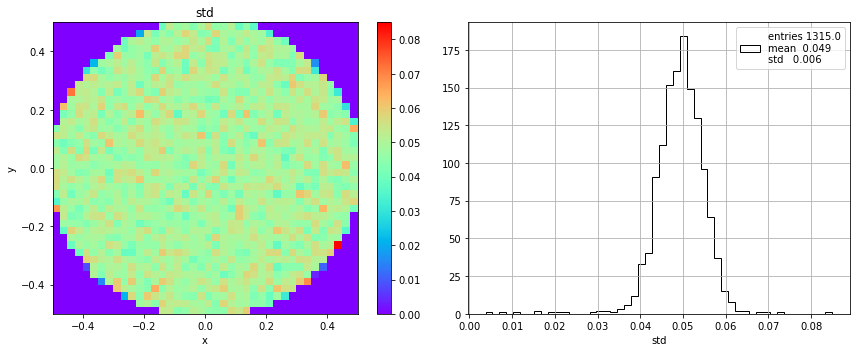

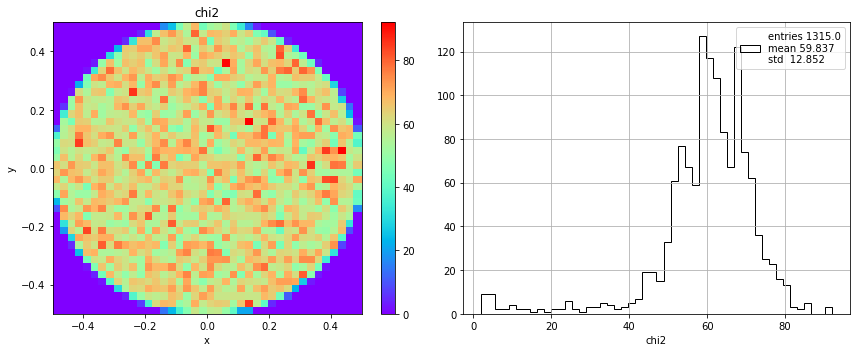

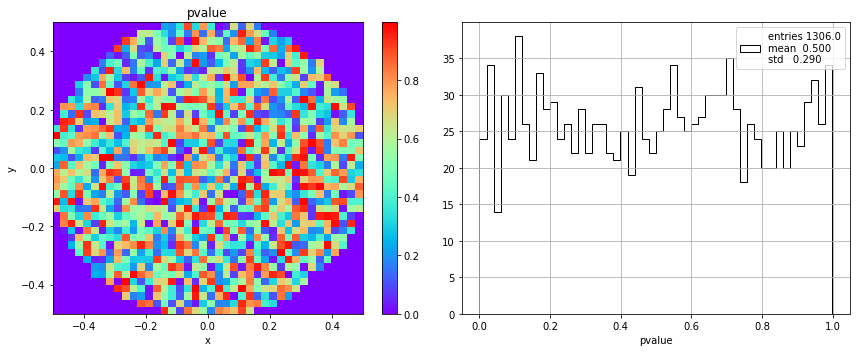

In [31]:
prof.plot_profile(corkrmap)

## 3D

In [33]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2)
df

,dtime,x,y,energy
0,0.678301,0.007230,-0.413281,34.076342
1,0.700883,-0.014940,-0.208256,38.819936
2,0.412796,-0.351330,0.197435,37.359182
3,0.807631,0.204279,0.255719,33.721318
4,0.164248,0.091143,-0.226076,43.160523
...,...,...,...,...
78565,0.340907,0.009549,-0.009412,41.709871
78566,0.565615,0.158455,0.284031,36.949821
78567,0.111755,0.038019,-0.195007,40.866569
78568,0.617665,0.311636,0.287728,35.546968


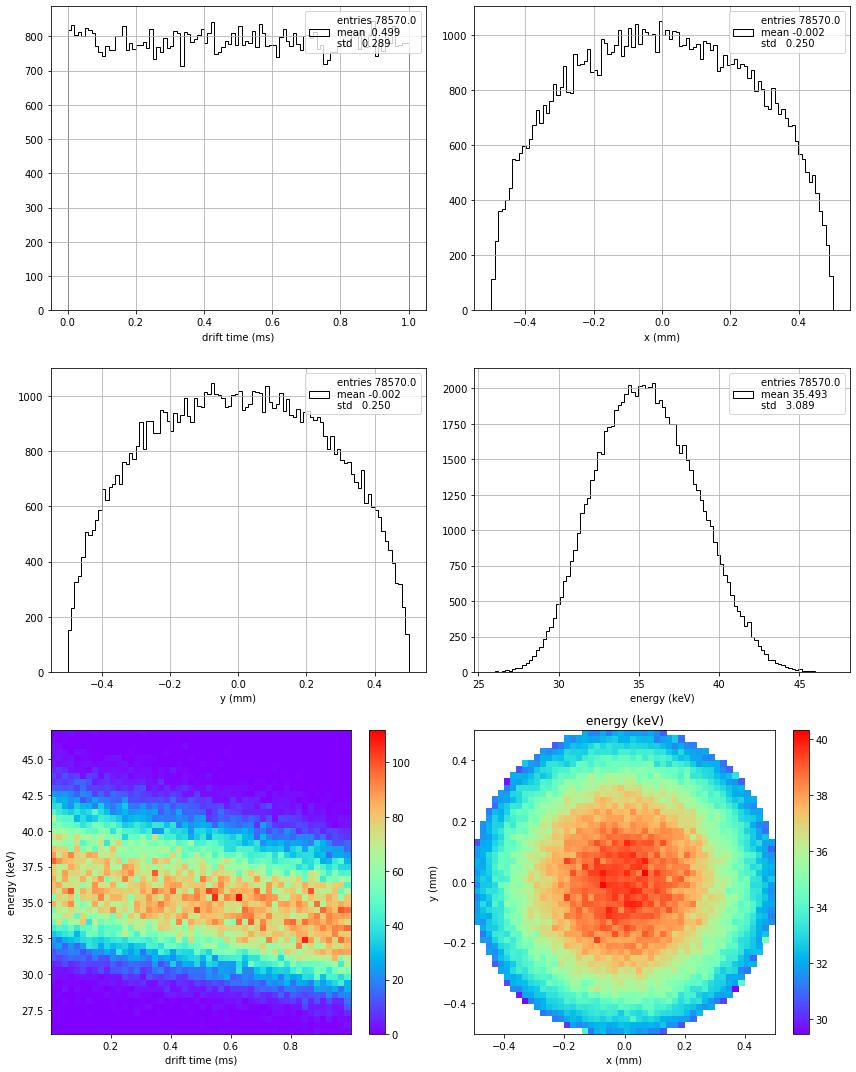

In [34]:
krana.plot_data(df, 50)

### Kr map

In [35]:
coors  = (df.x.values, df.y.values, df.dtime.values)
energy = df.energy.values
bins   = 20, 20, 4
krmap  = prof.profile(coors, energy, bins)

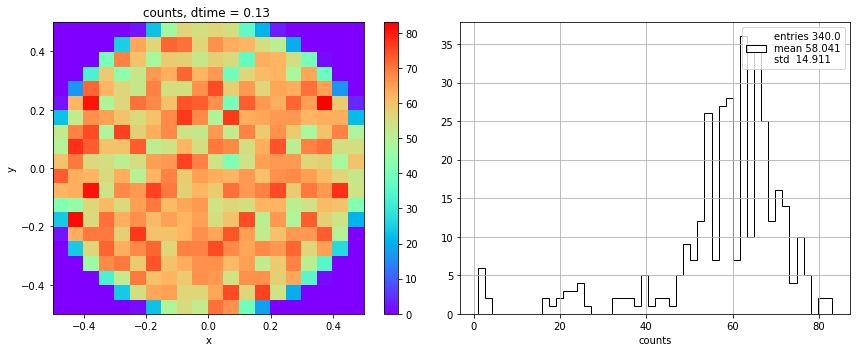

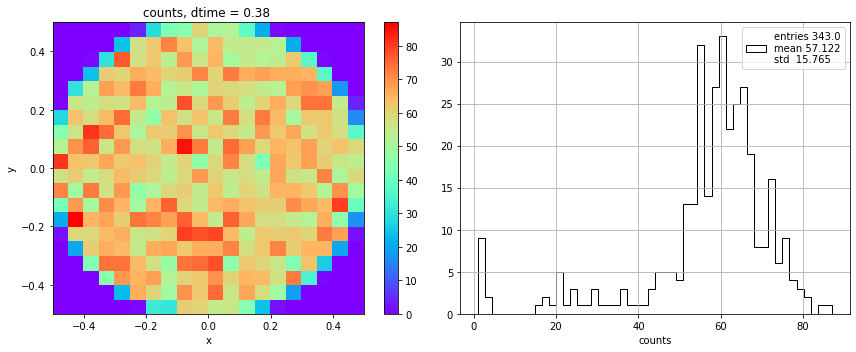

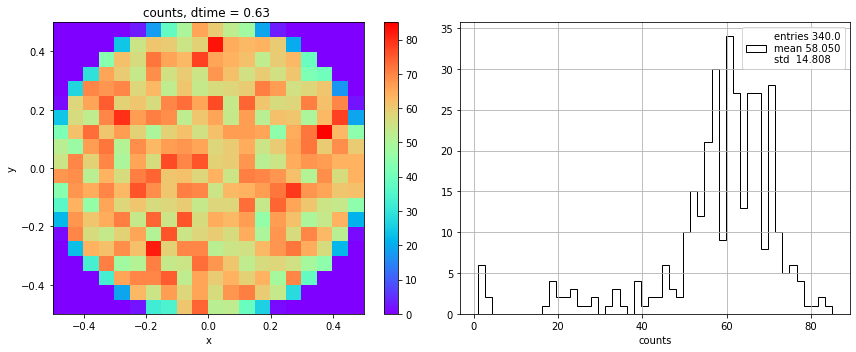

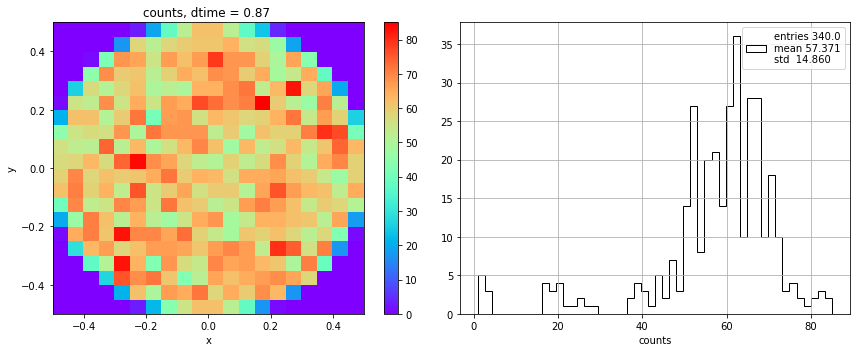

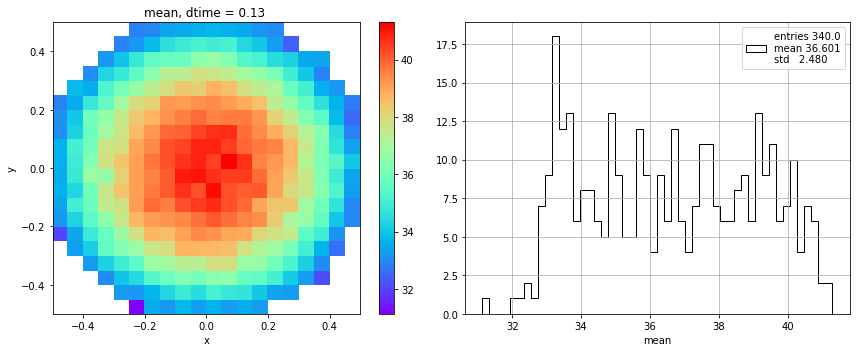

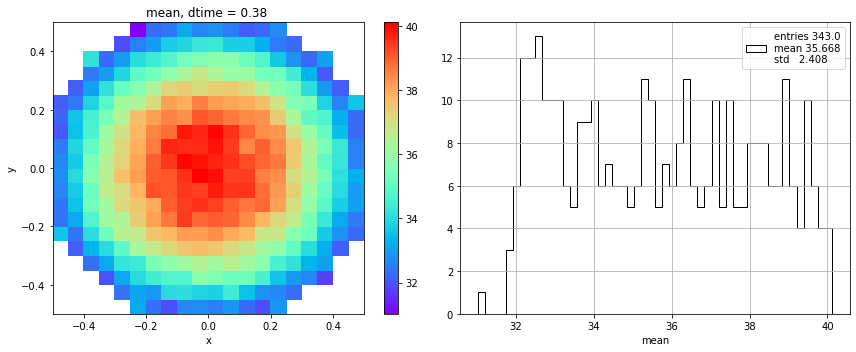

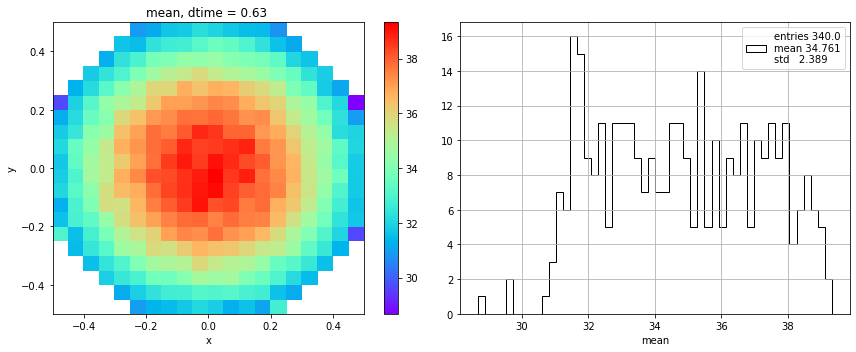

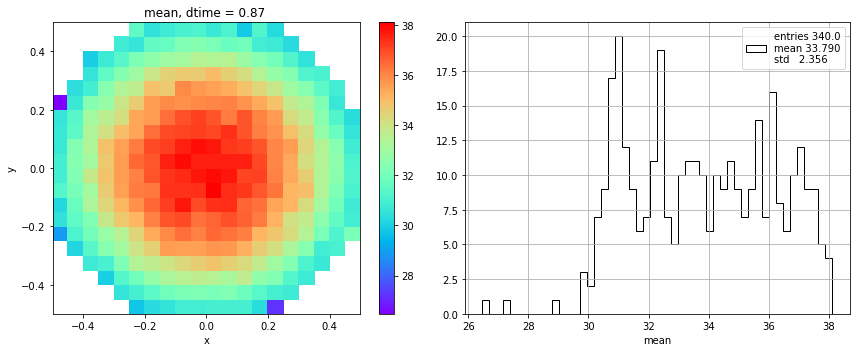

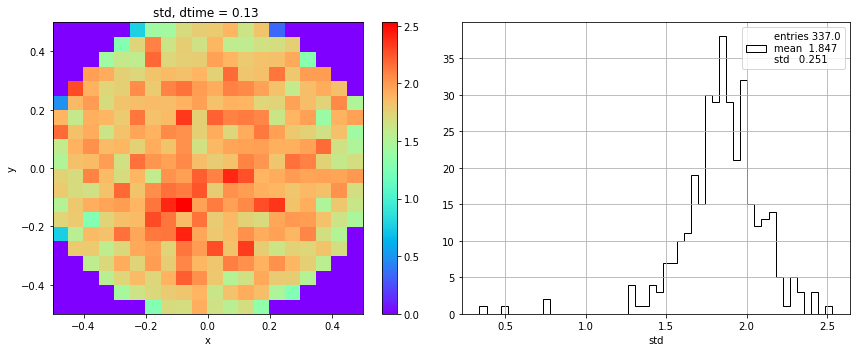

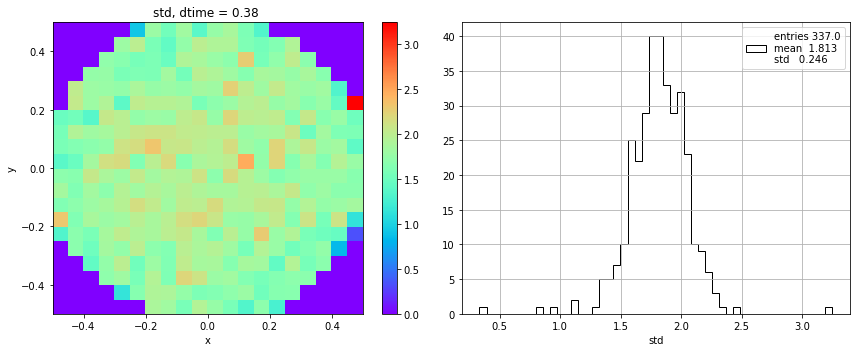

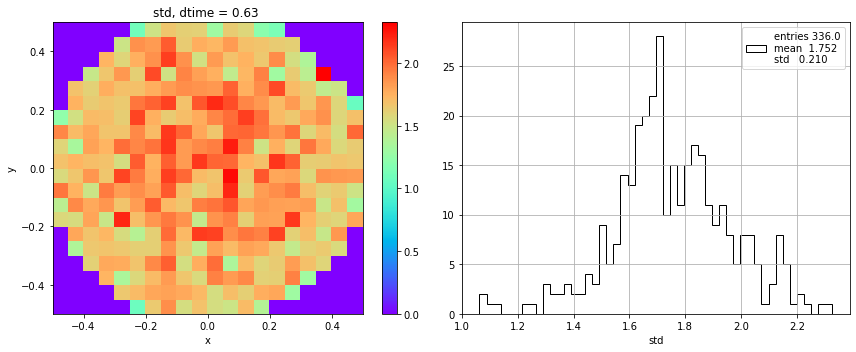

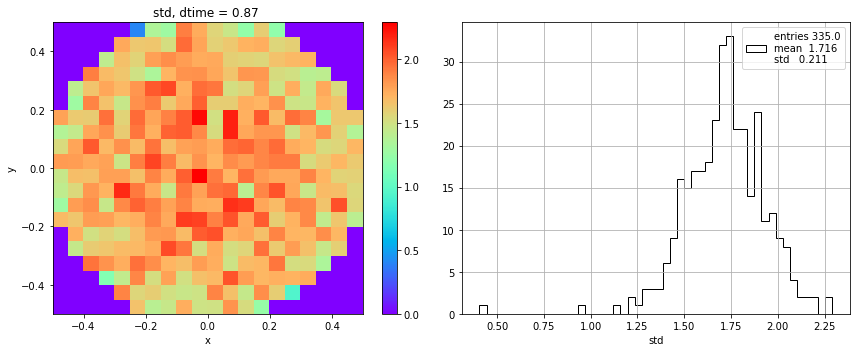

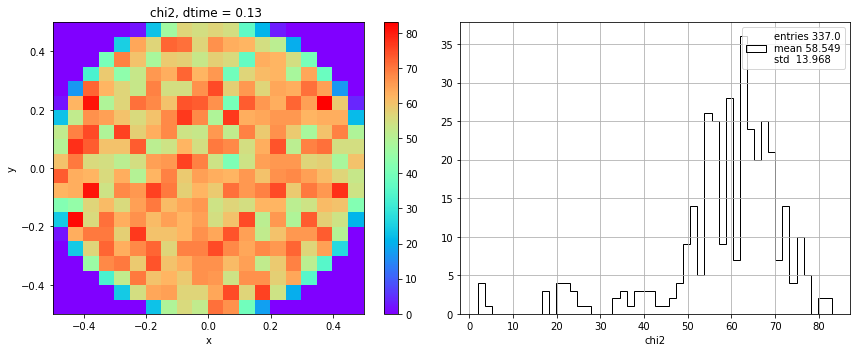

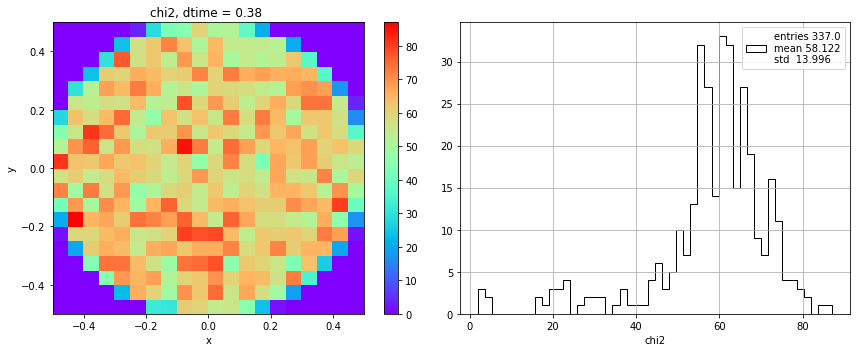

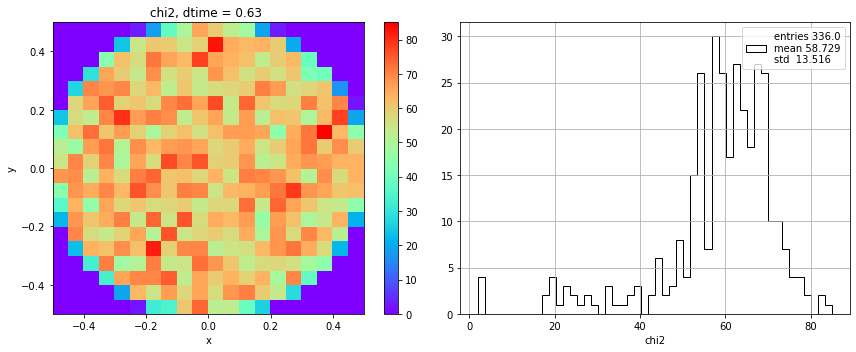

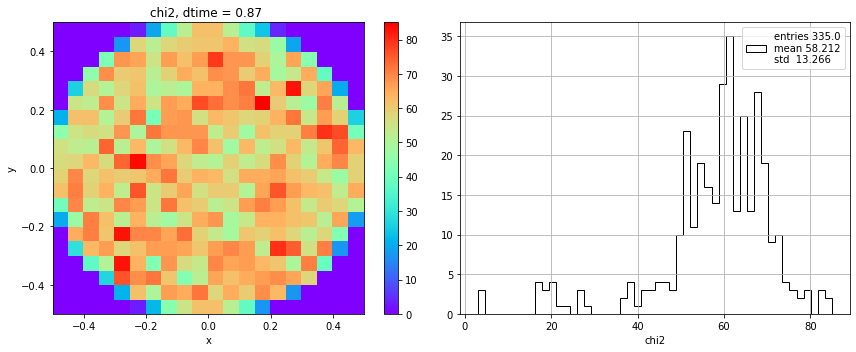

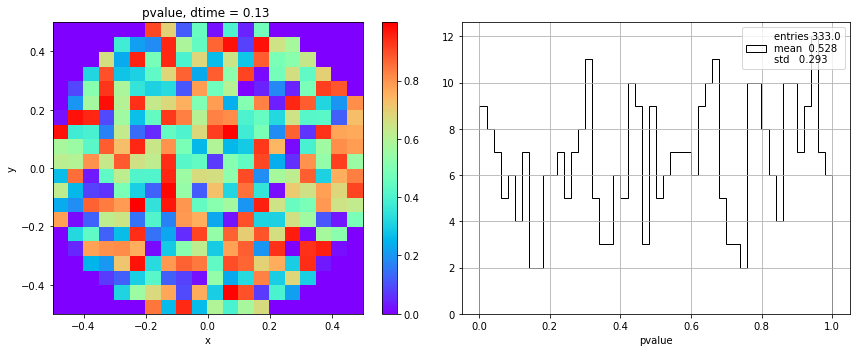

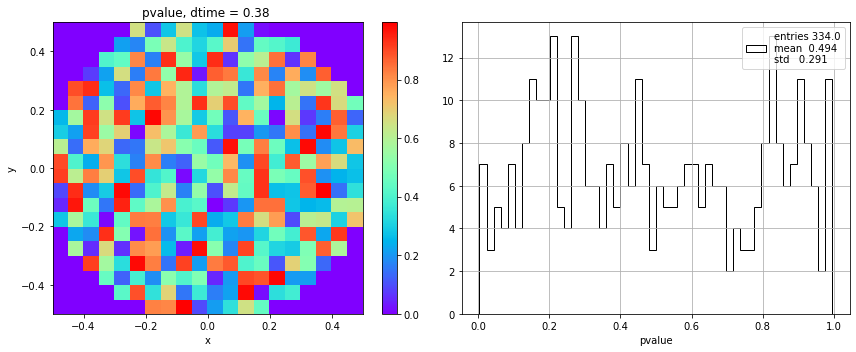

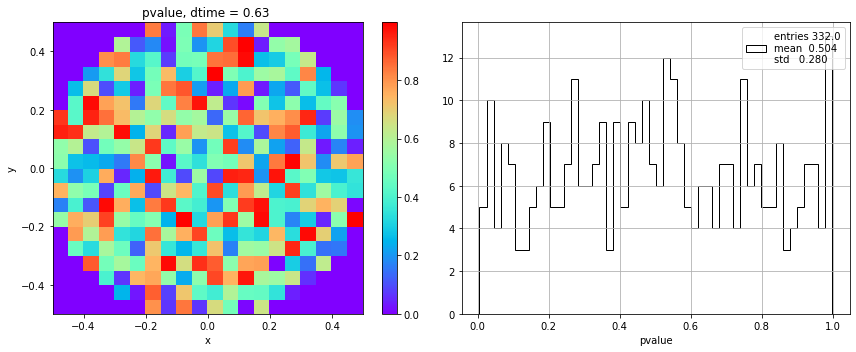

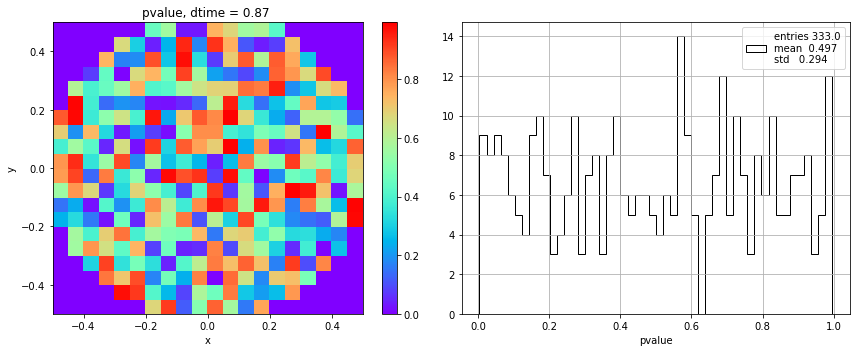

In [36]:
prof.plot_profile(krmap, coornames = ('x', 'y', 'dtime'));

### corrections

In [37]:
corenergy = prof.profile_scale(coors, energy, krmap)
corkrmap  = prof.profile(coors, corenergy, bins)

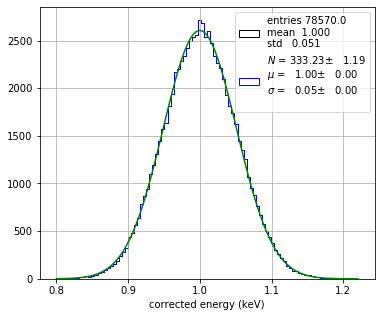

In [38]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100);
pltext.hfit(corenergy, 100, fun = 'gaus')
plt.xlabel('corrected energy (keV)');

### Validate correction

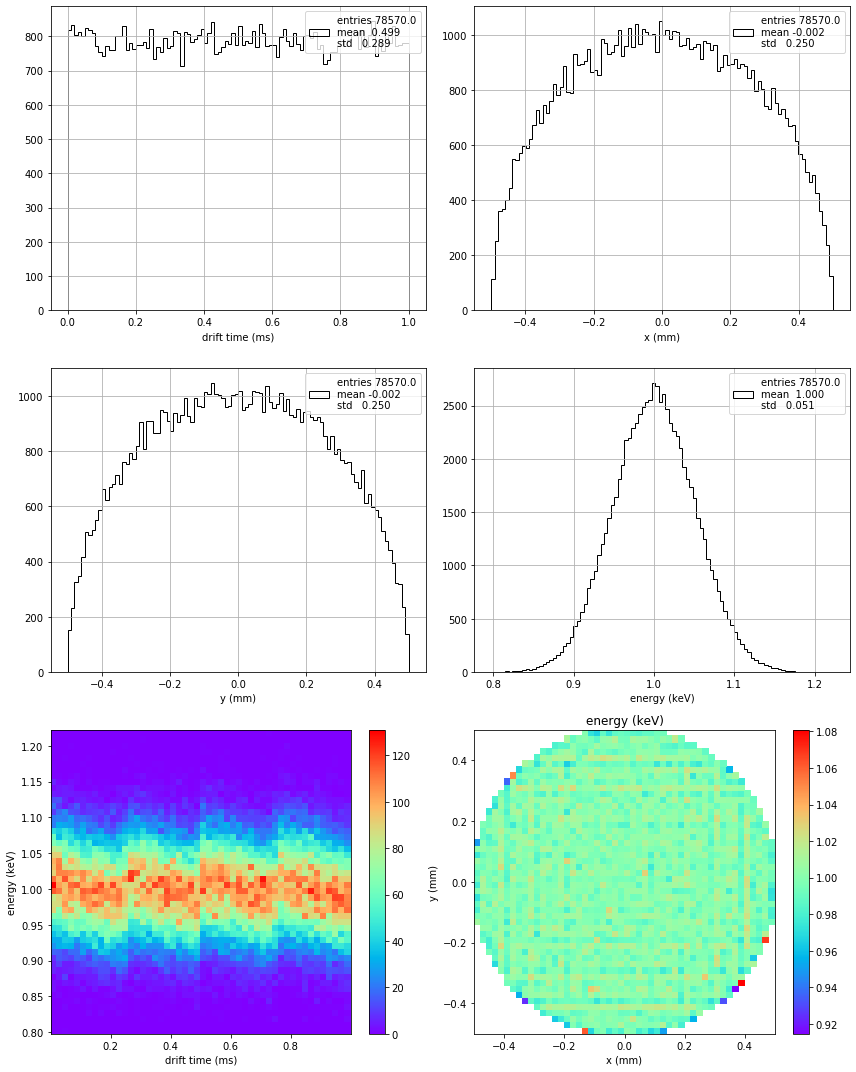

In [39]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf, 50);

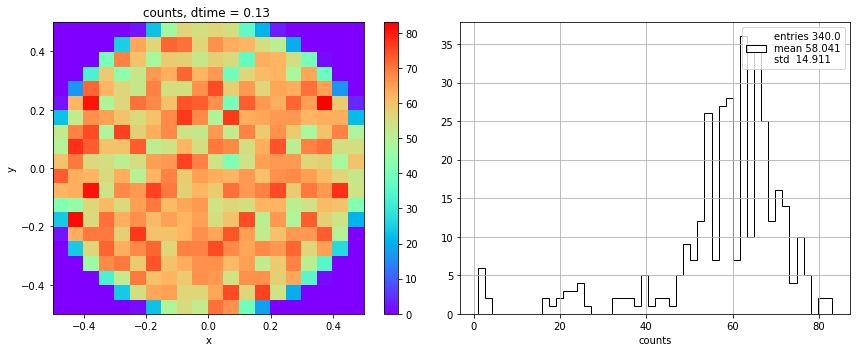

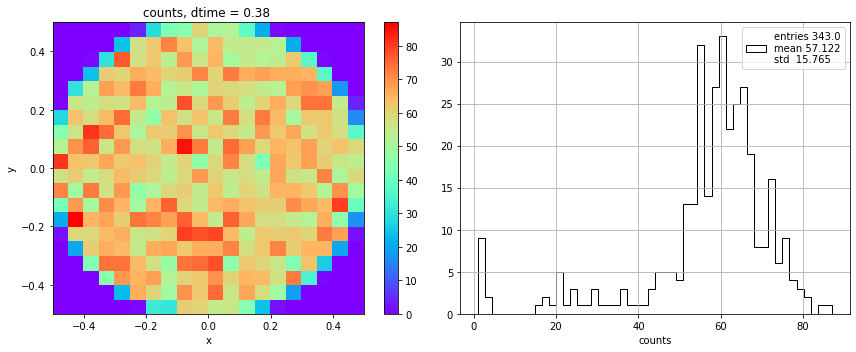

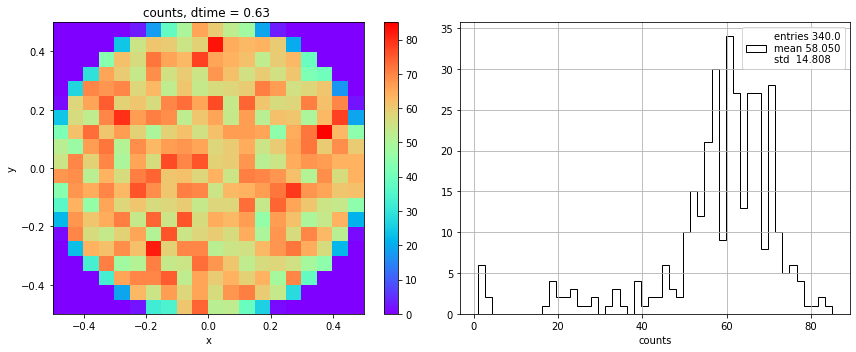

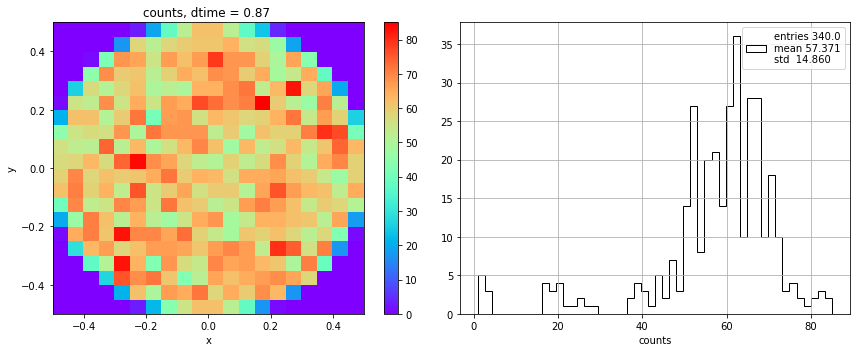

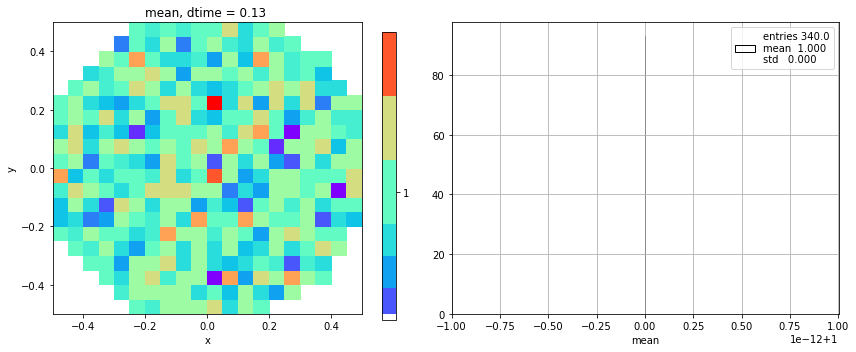

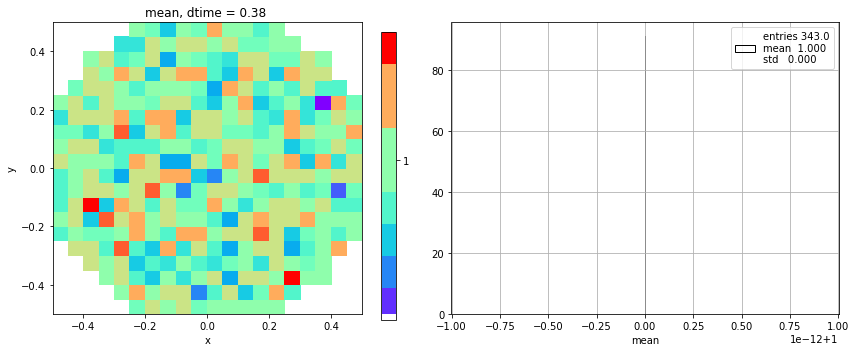

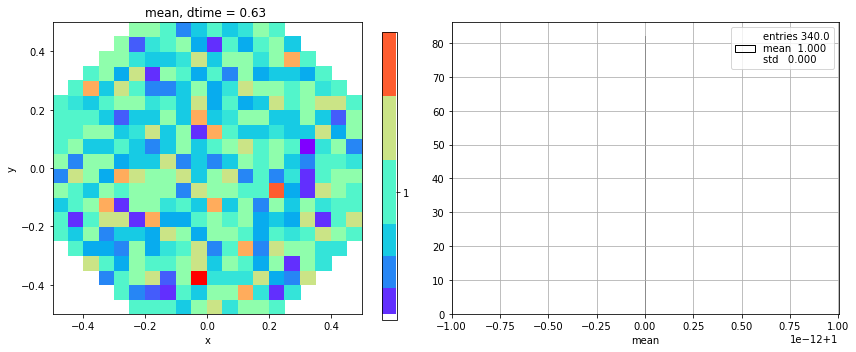

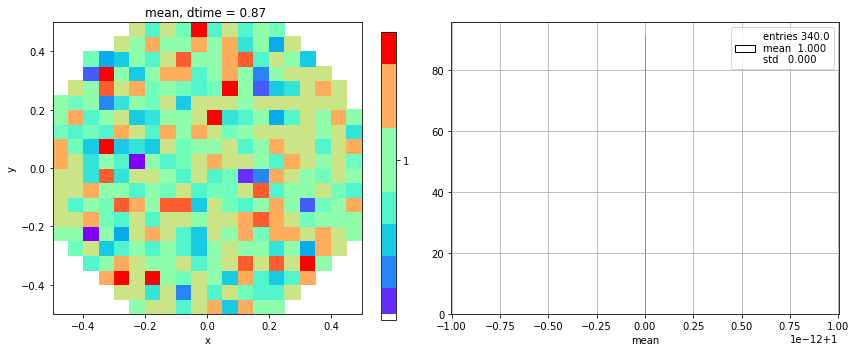

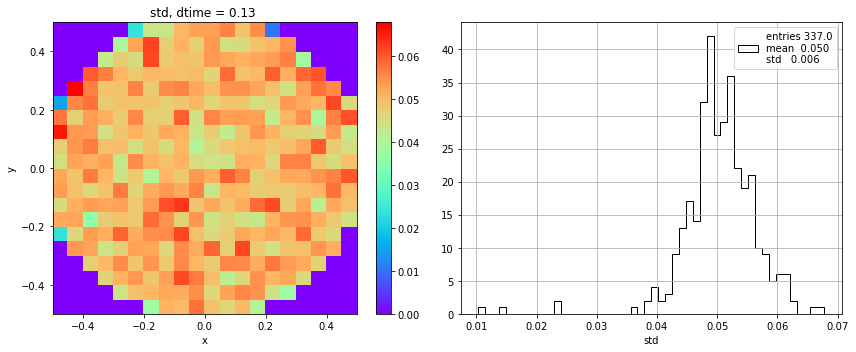

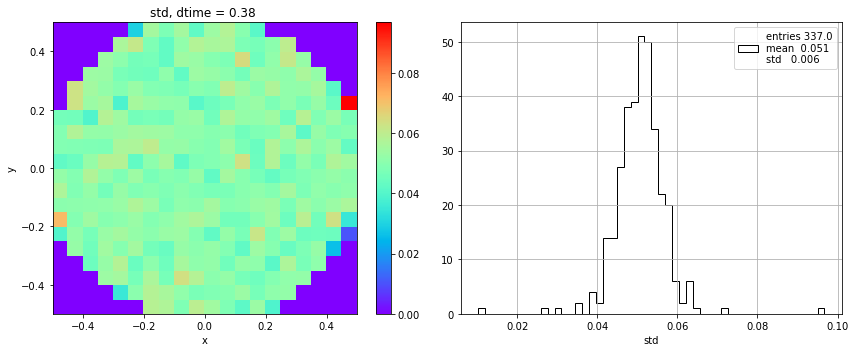

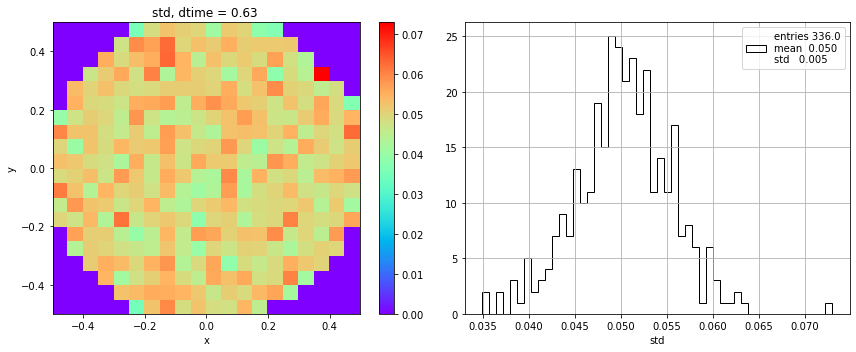

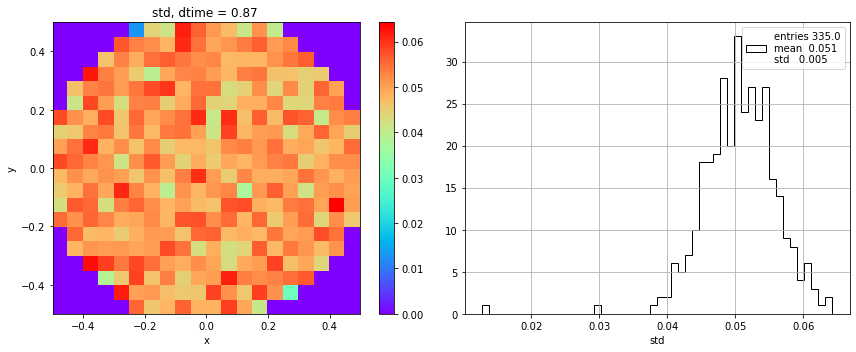

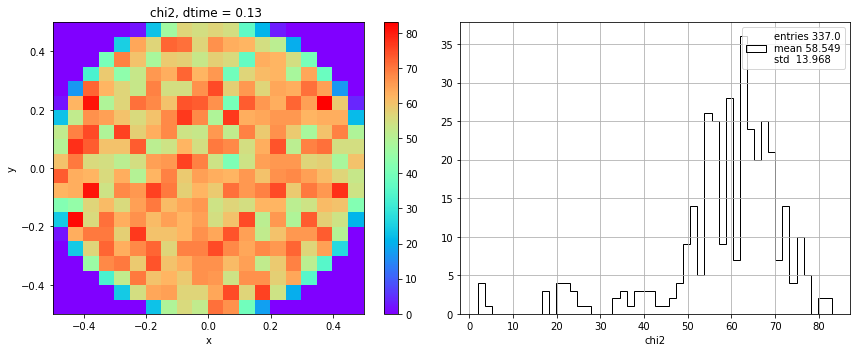

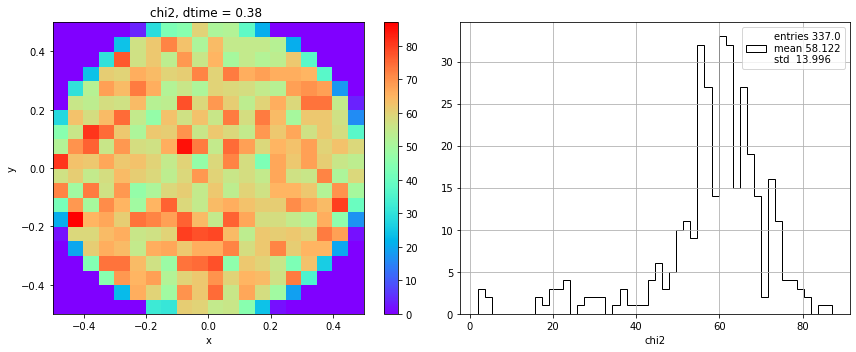

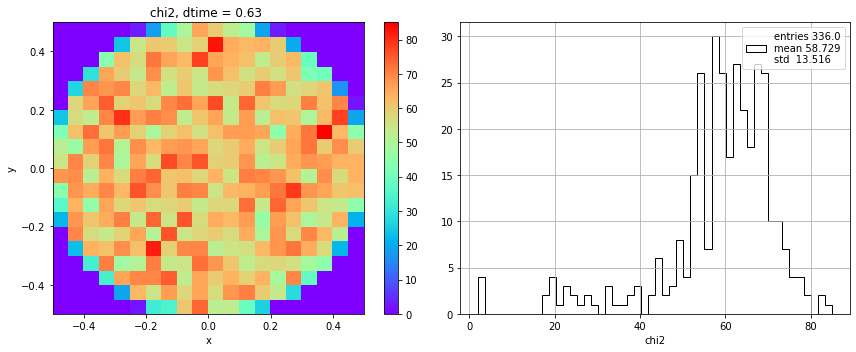

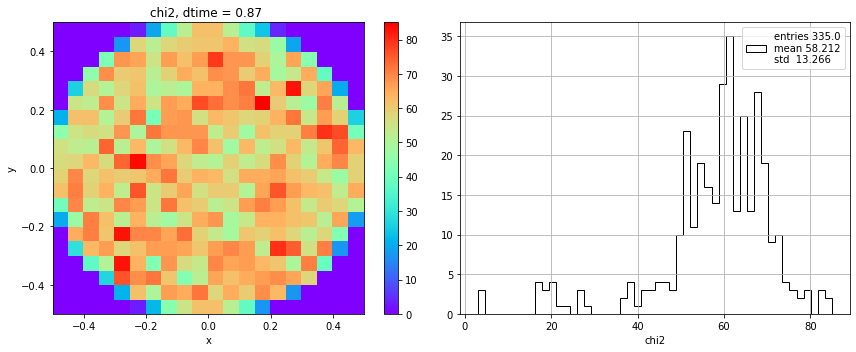

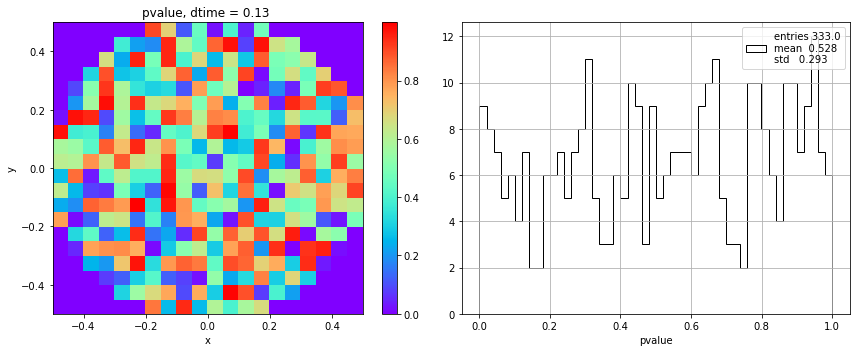

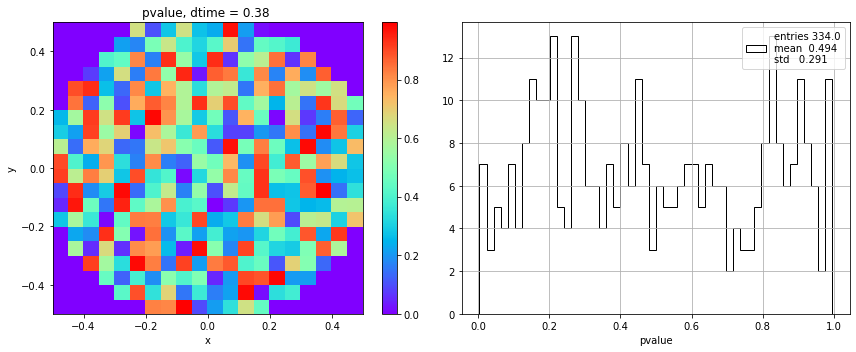

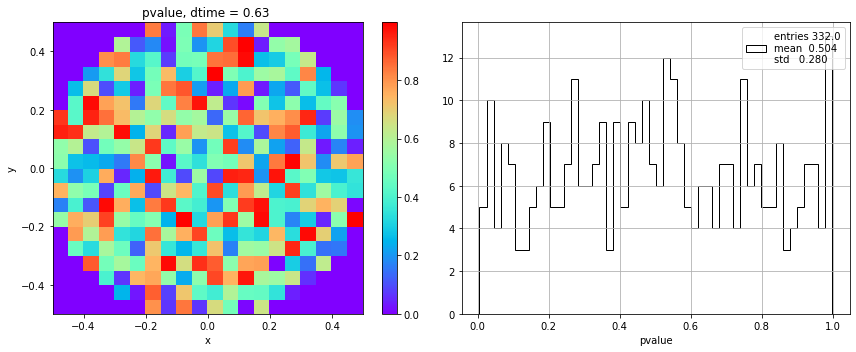

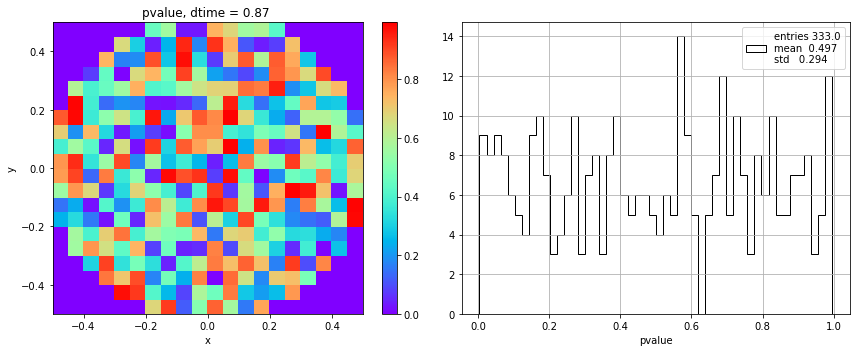

In [41]:
prof.plot_profile(corkrmap, coornames = ('x', 'y', 'dtime'));